<a href="https://colab.research.google.com/github/MDedipya/churn-modelling/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fraudTrain.csv to fraudTrain.csv
Saving fraudTest.csv to fraudTest.csv


In [ ]:
import pandas as pd

train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")

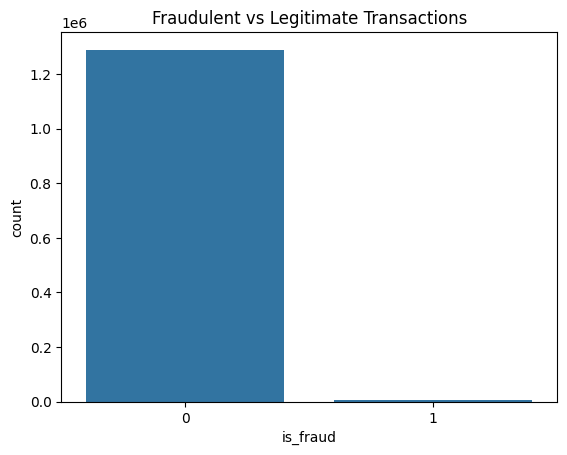

         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='is_fraud', data=train_df)
plt.title('Fraudulent vs Legitimate Transactions')
plt.show()

print(train_df.describe())
print(train_df.isnull().sum())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Convert 'trans_date_trans_time' to datetime objects and extract features
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['trans_year'] = train_df['trans_date_trans_time'].dt.year
train_df['trans_month'] = train_df['trans_date_trans_time'].dt.month
train_df['trans_day'] = train_df['trans_date_trans_time'].dt.day
train_df['trans_hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['trans_minute'] = train_df['trans_date_trans_time'].dt.minute
train_df['trans_second'] = train_df['trans_date_trans_time'].dt.second

# Drop non-numerical columns and the original datetime column
X = train_df.drop(['is_fraud', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num', 'dob'], axis=1)
y = train_df['is_fraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    257834
           1       0.08      0.76      0.15      1501

    accuracy                           0.95    259335
   macro avg       0.54      0.85      0.56    259335
weighted avg       0.99      0.95      0.97    259335



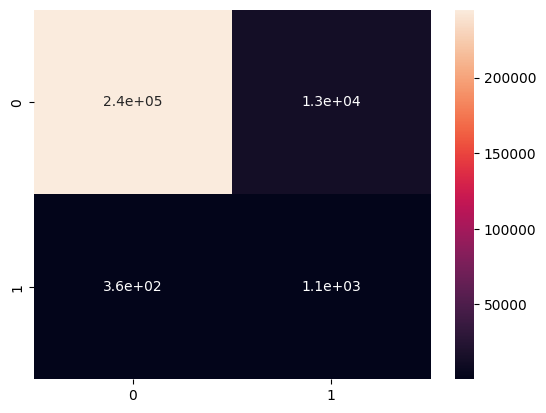

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    257834
           1       0.30      0.53      0.38      1501

    accuracy                           0.99    259335
   macro avg       0.65      0.76      0.69    259335
weighted avg       0.99      0.99      0.99    259335

